<a href="https://colab.research.google.com/github/Harrisson3/diabetes/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


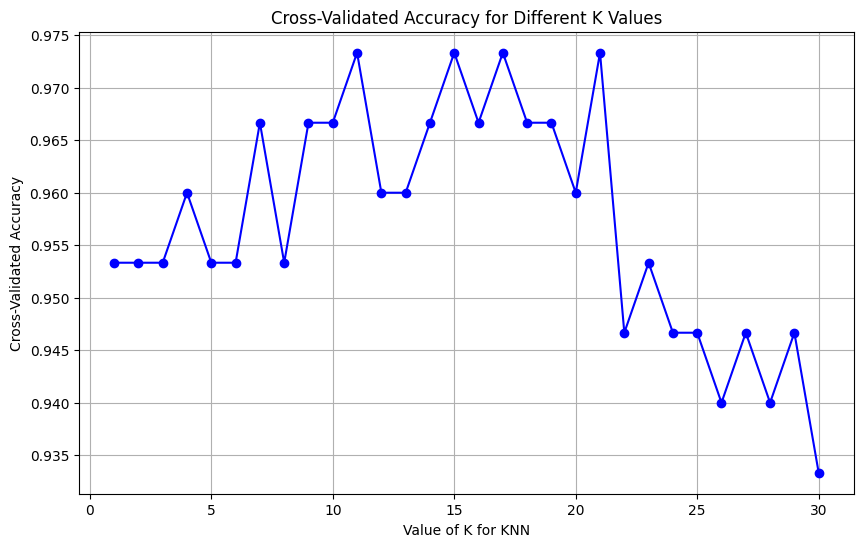

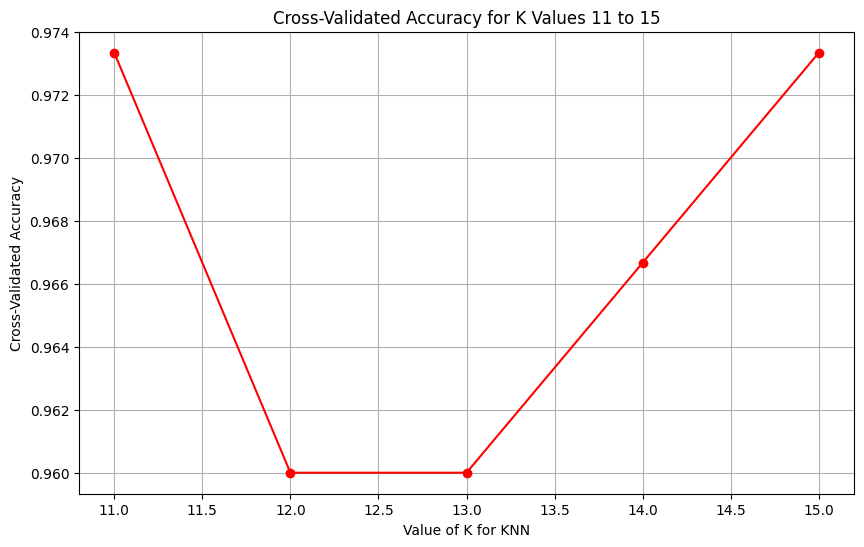

Optimal k value: 11
Highest cross-validated accuracy: 0.9733

GridSearchCV Results:
Best parameter (k): {'n_neighbors': 11}
Best cross-validated accuracy: 0.9733


In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Step 2: Load the Iris dataset from GitHub
url = "https://github.com/Harrisson3/diabetes/blob/main/Iris.csv?raw=true"
iris_df = pd.read_csv(url)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(iris_df.head())

# Step 3: Prepare the data
# Extract features (X) and labels (y)
X = iris_df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_df['Species']

# Step 4: Set up K-Fold cross-validation
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

# Step 5: Perform cross-validation for different k values
k_range = range(1, 31)  # k values from 1 to 30
k_scores = []  # To store mean cross-validated accuracy for each k

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=kfold, scoring='accuracy')
    k_scores.append(scores.mean())

# Step 6: Plot the results (First Graph)
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy for Different K Values')
plt.grid(True)
plt.show()

# Step 7: Plot the zoomed-in results (Second Graph)
plt.figure(figsize=(10, 6))
plt.plot(range(11, 16), k_scores[10:15], marker='o', linestyle='-', color='r')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy for K Values 11 to 15')
plt.grid(True)
plt.show()

# Step 8: Determine the optimal k value
optimal_k = k_range[np.argmax(k_scores)]
print(f"Optimal k value: {optimal_k}")
print(f"Highest cross-validated accuracy: {max(k_scores):.4f}")

# Step 9: Confirm with GridSearchCV
param_grid = {'n_neighbors': k_range}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold)
grid_search.fit(X, y)

print("\nGridSearchCV Results:")
print(f"Best parameter (k): {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")